In [1]:
!python --version

Python 3.10.13


In [5]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

np.random.seed(20240228)

# Settings
n = 1000
R = 5000

# Define true function expecting the feature matrix as input
def f(X):
    return X[:, 0]**3 - 3.5*X[:, 0]**2 + 3*X[:, 0]

# Specific values to evaluate
x_values = np.array([[0.1, 0, 0], [1.1, 0, 0]])

# Values for plot
first_dim = np.arange(0, 2.05, 0.05)
x_values_to_plot = np.column_stack((first_dim, np.zeros(len(first_dim)), np.zeros(len(first_dim))))


# Initialize
results = []
results_to_plot = []

# Monte Carlo simulation
for _ in range(R):

    # Generate data
    X1, X2, X3 = [np.random.uniform(0, 2, n) for _ in range(3)]
    X = np.column_stack((X1, X2, X3))
    epsilon = np.random.normal(0, 1, n)
    Y = f(X) + epsilon

    # Model 1
    model1 = LinearRegression().fit(X, Y)
    pred1 = model1.predict(x_values)

    # Model 2
    poly2 = PolynomialFeatures(3)
    X_poly2 = poly2.fit_transform(X[:, 0].reshape(-1, 1))
    model2 = LinearRegression().fit(X_poly2, Y)
    pred2 = model2.predict(poly2.transform(x_values[:, 0].reshape(-1, 1)))

    # Model 3
    poly3 = PolynomialFeatures(3)
    X_poly3 = poly3.fit_transform(X)
    model3 = LinearRegression().fit(X_poly3, Y)
    pred3 = model3.predict(poly3.transform(x_values))

    # Predict for the whole range for the first 20 runs
    if _ < 20:
        pred1_to_plot = model1.predict(x_values_to_plot)
        pred2_to_plot = model2.predict(poly2.transform(x_values_to_plot[:, 0].reshape(-1, 1)))
        pred3_to_plot = model3.predict(poly3.transform(x_values_to_plot))
        results_to_plot.append([pred1_to_plot, pred2_to_plot, pred3_to_plot])

    # Store results
    results.append([pred1, pred2, pred3])

# Compute bias, variance and MSE
results = np.array(results)
bias = np.mean(results, axis=0) - f(x_values)
variance = np.var(results, axis=0)
mse = np.mean((results - f(x_values))**2, axis=0)

# Organize results into a table
df = pd.DataFrame({
    'x1': np.tile(x_values[:, 0], 3),
    'model': np.repeat(['Model 1', 'Model 2', 'Model 3'], 2),
    'bias': bias.flatten(),
    'variance': variance.flatten(),
    'MSE': mse.flatten()
})
df.sort_values(by=["x1", "model"])

,x1,model,bias,variance,MSE
0,0.1,Model 1,0.429358,0.009972,0.194320
2,0.1,Model 2,0.001421,0.007670,0.007672
4,0.1,Model 3,0.006316,0.161381,0.161421
1,1.1,Model 1,-0.102031,0.007388,0.017799
3,1.1,Model 2,0.000169,0.002441,0.002441
5,1.1,Model 3,0.008446,0.082898,0.082969


	model   	  bias  	variance 	MSE
	Model 1 	0.430509 	0.020726 	0.206065
	Model 2 	0.002454 	0.015224 	0.015230
	Model 3 	0.011503 	0.352511 	0.352643
These models represent how the first model is more simple, and thus underfit. This can be seen as a result of high bias and low variance. 
The third model is low bias yet high variance. 
So, model two would be the best fit. 

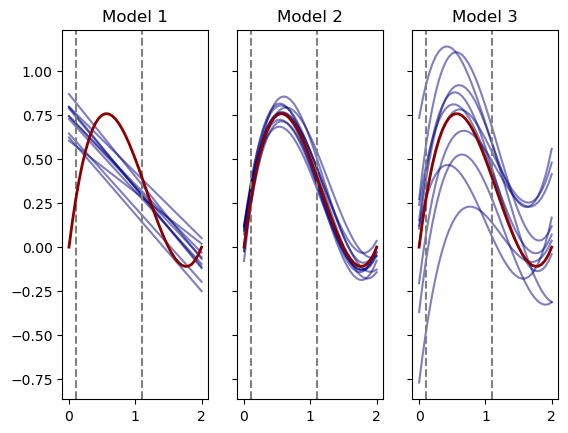

In [6]:
# Plotting predictions
import matplotlib.pyplot as plt

# Create a figure and axis objects
fig, axs = plt.subplots(1, 3, sharey=True)

# Iterate over each subchart
for i, ax in enumerate(axs):
    # Plot each line for the current subchart
    for j in range(10):
        ax.plot(x_values_to_plot[:, 0], results_to_plot[j][i], color="navy", alpha=0.5)

    for x_val in x_values[:, 0]:
        ax.axvline(x_val, color='gray', linestyle='dashed', label=f'x = {x_val}')

    ax.plot(x_values_to_plot[:, 0], f(x_values_to_plot), color="darkred", linewidth=2)

    ax.set_title(f'Model {i+1}')

plt.show()


## Part 2: Split training and test set

In [8]:
# Assuming dataset is your list with 1000 values
dataset_length = len(df)

# Calculate the split index
split_index = dataset_length // 2

# Split the dataset
training_set = df[:split_index]
test_set = df[split_index:]


### Estimate the three models over the training sample'

### Computer the mean squared prediction errors over the test sample: 